In [235]:
import numpy as np
from math import *
from matplotlib import pyplot as plt

# 1. Code des fonctions nécéssaires à centering_step et barr_method

In [236]:
def Hessienne(Q,p,A,b,t,v):
  return t*2*Q + Hessienne_barriere(A,b,v)

def Gradient(Q,p,A,b,t,v):
  return t*2*Q@v + t*p + Gradient_barriere(A,b,v)

def Gradient_barriere(A,b,v):
  gradient=np.zeros((np.shape(A)[1],1)) 
  Av=A@v
  for i in range (np.shape(A)[1]):
    gradient+=A[i].reshape(np.shape(A)[1],1)/(b[i]-Av[i])
  return gradient

def Hessienne_barriere(A,b,v):
  Av=A@v
  hessienne=np.zeros((np.shape(A)[1],np.shape(A)[1]))
  for i in range (np.shape(A)[1]):
    Ai=A[i].reshape(np.shape(A)[1],1)@np.transpose(A[i].reshape(np.shape(A)[1],1))
    hessienne+=Ai/((b[i]-Av[i])**2)
  return hessienne

def backtracking(Q,p,A,b,t,v,Newton_step,decrement):
  alpha=0.2
  beta=0.8
  ti=1
  for i in range(20) :
    if (fonction(Q,p,A,b,t,v+ti*Newton_step)<fonction(Q,p,A,b,t,v)-alpha*ti*decrement) :
      break
    ti=beta*ti

  return ti

def barriere(A,b,v):
  bar=0
  for i in range (np.shape(A)[1]):
    ui=b[i]-np.matmul(A[i],v)
    if (ui<0): #This is in case the candidate in the backtracking step is not in the domain of the barrier function
      return 100000
    bar-=log(ui)
  return bar

def fonction(Q,p,A,b,t,v):
  
  return t*np.transpose(v)@Q@v + t*np.transpose(p)@v + barriere(A,b,v)

def true_fonction(Q,p,A,b,v):
    return np.transpose(v)@Q@v + np.transpose(p)@v

def centering_step (Q,p,A,b,t,v0,eps):
  v=v0
  m=np.shape(A)[0]
  arguments=[]
  values=[]
  decrements=[]
  duality_gap=[]
  while True :
    H=Hessienne(Q,p,A,b,t,v)
    H_square_inverse=np.linalg.inv(np.matmul(H,H))
    G=Gradient(Q,p,A,b,t,v)
    Newton_step=-np.matmul(H_square_inverse,G)
    Newton_decrement=-np.transpose(G)@Newton_step
    backtrack=backtracking(Q,p,A,b,t,v,Newton_step,Newton_decrement)

    arguments.append(v.copy())
    values.append(true_fonction(Q,p,A,b,v))
    decrements.append(Newton_decrement)
    duality_gap.append(m/t)

    if (Newton_decrement)/2 < eps :
      break

    v+=backtrack*Newton_step
    
    
    
    
  
  return arguments,values,decrements,v,duality_gap


In [250]:
def barr_method(Q,p,A,b,v0,eps,mu):
  print("Barrier method for mu=",mu)
  print("========================")
  t=1
  m=np.shape(A)[0]
  arguments=[]
  values=[]
  decrements=[]
  duality_gap=[]
  v=v0.copy()
  while True :
    
    center=centering_step(Q,p,A,b,t,v,0.05)
    arguments.extend(center[0])
    values.extend(center[1])
    decrements.extend(center[2])
    duality_gap.extend(center[4])

    v=center[3]
    if (m/t < eps) :
      break
    
    t=t*mu

  return arguments,values,decrements,duality_gap



# 2.Test de centering avec $A = Q = I_2$, $p=q=0$, $V_0=(-1,-1)$, $t=100$, $precision criteria=0.000001$
For these parameters, we are looking for the minimum of $100x^{2}+log(-x)+100y^{2}+log(-y)$ for $x,y<0$
The function is convex and has a minimum where its gradient is equal to therefore for $200x=\frac{1}{x}$ (same for $y$)
By computing we find $x=y=-\frac{\sqrt{2}}{10}$ which is about $0.07$, which is the argmin returned by our test

In [192]:
A=np.eye(2)
b=np.zeros((2,1))
Q=np.eye(2)
p=np.zeros((2,1))
v0=-np.ones((2,1))
t=100

In [193]:
center=centering_step(Q,p,A,b,t,v0,0.000001)
print("argmin : ", center[0][-1])
print("=====")
print("minimum ", center[1][-1])
print("=====")
print ("10 dernières iterations of v : \n",center[0][-10:-1])
print("=====")
print("10 dernières valeurs de la vrai fonction (sans la barrière) : ",center[1][-10:-1])
print("=====")



argmin :  [[-0.07170329]
 [-0.07170329]]
=====
minimum  [[0.01028272]]
=====
10 dernières iterations of v : 
 [array([[-0.07172639],
       [-0.07172639]]), array([[-0.0717238],
       [-0.0717238]]), array([[-0.07172121],
       [-0.07172121]]), array([[-0.07171863],
       [-0.07171863]]), array([[-0.07171606],
       [-0.07171606]]), array([[-0.07171349],
       [-0.07171349]]), array([[-0.07171093],
       [-0.07171093]]), array([[-0.07170837],
       [-0.07170837]]), array([[-0.07170583],
       [-0.07170583]])]
=====
10 dernières valeurs de la vrai fonction (sans la barrière) :  [array([[0.01028935]]), array([[0.01028861]]), array([[0.01028786]]), array([[0.01028712]]), array([[0.01028639]]), array([[0.01028565]]), array([[0.01028491]]), array([[0.01028418]]), array([[0.01028345]])]
=====


# 3. Test de barr_method avec les mêmes paramètres que pour le test de centering et une précision $\epsilon = 0.01$ et $\mu =10$

In [197]:
A=np.eye(2)
b=np.zeros((2,1))
Q=np.eye(2)
p=np.zeros((2,1))
v0=-np.ones((2,1))

eps=0.01
mu=10

In [198]:
output=barr_method(Q, p, A, b, v0, eps, mu)
print("argmin = ",output[0][-1])
print("====")
print("minimum = ", output[1][-1])

2.0
0.2
0.02
0.002
argmin =  [[-0.03117898]
 [-0.03117898]]
====
minimum =  [[0.00194426]]


# Plot des valeurs de f

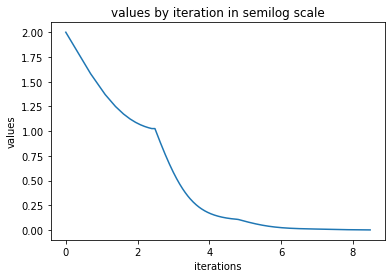

In [200]:
values = output[1]
min=values[-1][0][0]
y=[]
for i in values :
  y.append(i[0][0])
x = np.log(np.arange(1,len(y)+1,1))
plt.plot(x,y)
plt.xlabel("iterations")
plt.ylabel("values")
plt.title('values by iteration in semilog scale')
plt.show()

# Plot du duality gap 

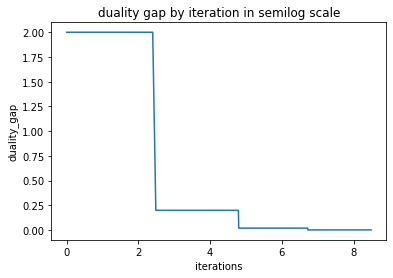

In [201]:
duality_gap = output[3]
y=[]
for i in duality_gap :
  y.append(i)
x = np.log(np.arange(1,len(y)+1,1))
plt.plot(x,y)
plt.xlabel("iterations")
plt.ylabel("duality_gap")
plt.title('duality gap by iteration in semilog scale')
plt.show()

# Plot des Newton decrements

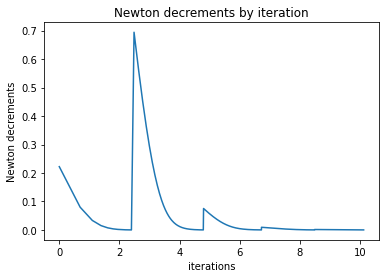

In [113]:
decrements=output[2]
y=[]
for i in decrements :
  y.append(i[0][0])
x = np.log(np.arange(1,len(y)+1,1))
plt.plot(x,y)
plt.xlabel("iterations")
plt.ylabel("Newton decrements")
plt.title('Newton decrements by iteration in semi log scale')
plt.show()

# 4. Analyse de la méthode barrière pour différents paramètres X et y générés aléatoirements

In [268]:
#transform the Lasso problem into QP by changing the parameters
def transform_parameters(X,y,lambd):
    p=-1*(y/sqrt(2*lambd))
    X_transpose=np.transpose(X)
    A=np.concatenate((X_transpose,-X_transpose))
    return p,A



1. Analyse pour X et y générés aléatoirement avec $n=d=10$

In [269]:
#initialize parameters
X=200*np.random.random((10,10))-100*np.ones((10,10))
y=200*np.random.random((10,1))-100*np.ones((10,1))
v=np.ones((10,1))
v=(np.transpose(X)@v)
m=max(v)
v0=-v/(2*m)

Q=np.eye(10)/2
p,A=transform_parameters(X,y,10)

b=sqrt(20)*np.ones((np.shape(A)[0],1))
eps=0.01

Barrier method for mu= 2
Barrier method for mu= 15
Barrier method for mu= 50
Barrier method for mu= 100


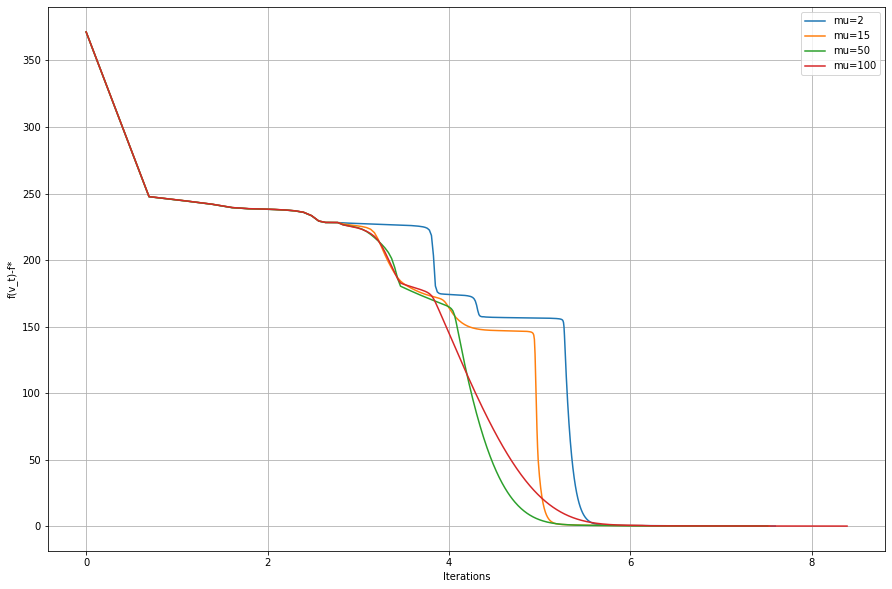

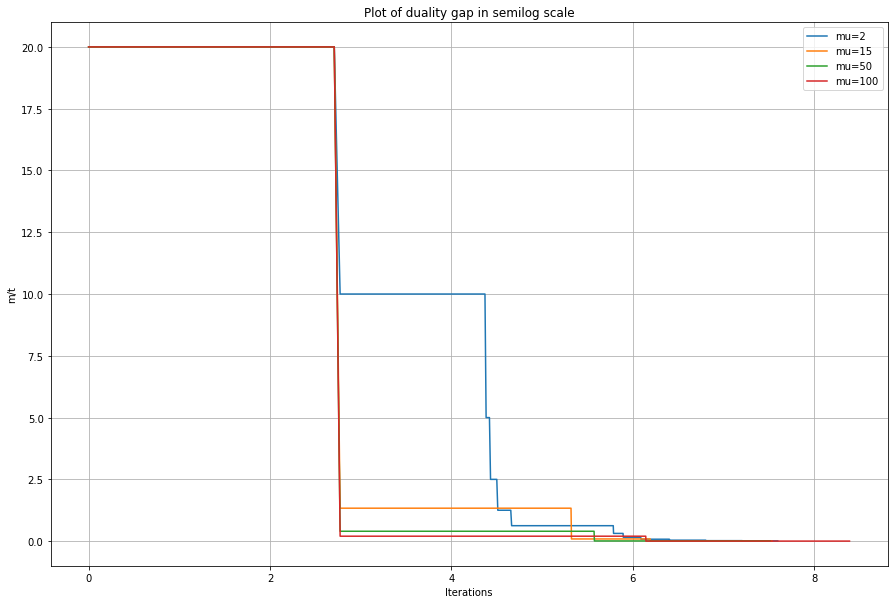

In [270]:
#plot
fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(15,10))
for mu in [2,15,50,100]:
    output=barr_method(Q,p,A,b,v0,eps,mu)
    values=output[1]
    duality_gap=output[3]
    minimum=values[-1][0][0]
    u=[]
    for i in values :
        u.append(i[0][0]-minimum)
    x = np.log(np.arange(1,len(u)+1,1))
    ax.plot(x, u,label="mu="+str(mu))
    ax.set(xlabel='Iterations', ylabel='f(v_t)-f*')
    plt.title('Plot of gap f(v_t)-f* in semilog scale')
    v=[]
    for i in duality_gap :
        v.append(i)
    x = np.log(np.arange(1,len(v)+1,1))
    ax1.plot(x, v,label='mu='+str(mu))
    ax1.set(xlabel='Iterations', ylabel='m/t')
    plt.title("Plot of duality gap in semilog scale")
    
ax.grid()
ax.legend()
ax1.grid()
ax1.legend()
plt.show()

2. Analyse pour X et y générés aléatoirement pour $n=d=20$

In [271]:
X=200*np.random.random((20,20))-100*np.ones((20,20))

y=200*np.random.random((20,1))-100*np.ones((20,1))
v=np.ones((20,1))
v=(np.transpose(X)@v)
m=max(v)
v0=-v/(2*m)

Q=np.eye(20)/2
p,A=transform_parameters(X,y,10)

b=sqrt(20)*np.ones((np.shape(A)[0],1))
eps=0.01

Barrier method for mu= 2
Barrier method for mu= 15
Barrier method for mu= 50
Barrier method for mu= 100


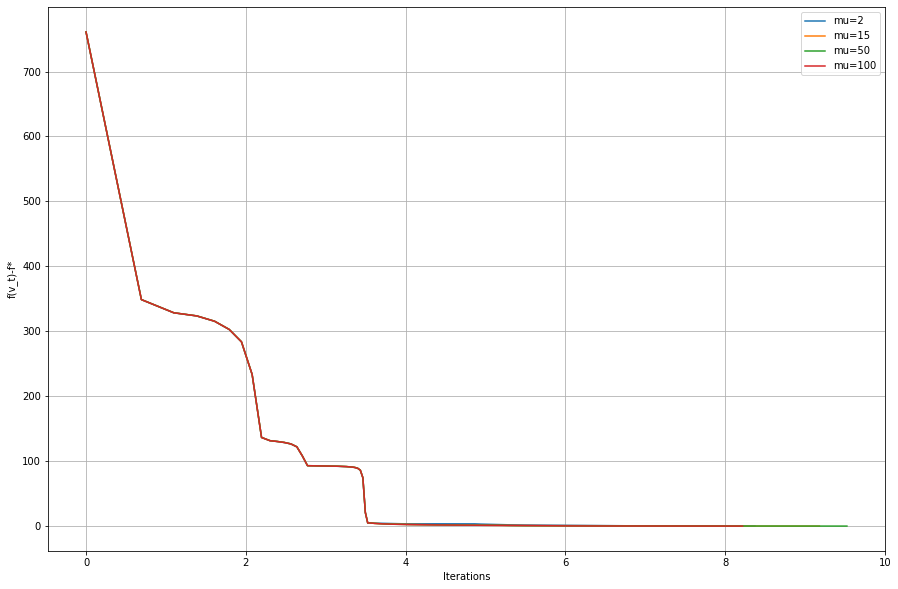

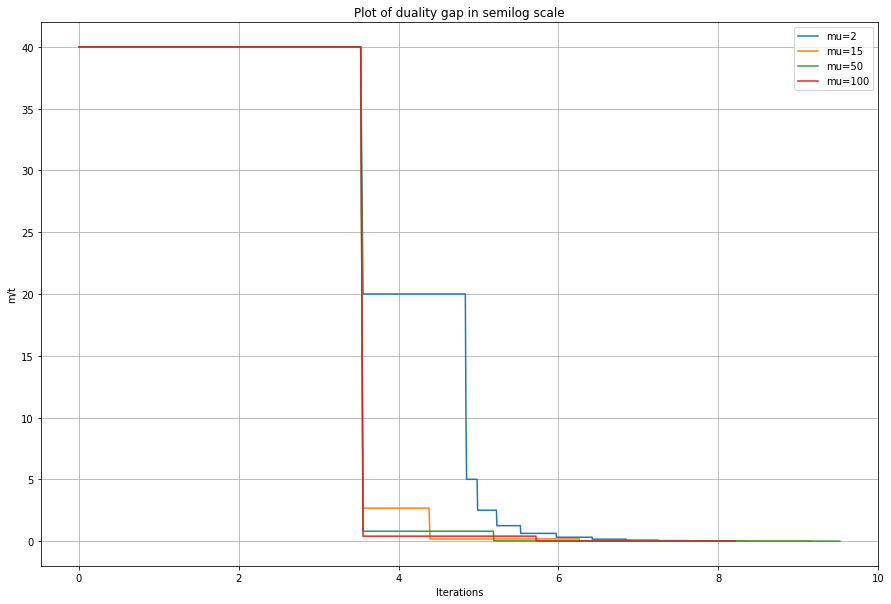

In [272]:
fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(15,10))
for mu in [2,15,50,100]:
    output=barr_method(Q,p,A,b,v0,eps,mu)
    values=output[1]
    duality_gap=output[3]
    minimum=values[-1][0][0]
    u=[]
    for i in values :
        u.append(i[0][0]-minimum)
    x = np.log(np.arange(1,len(u)+1,1))
    ax.plot(x, u,label="mu="+str(mu))
    ax.set(xlabel='Iterations', ylabel='f(v_t)-f*')
    plt.title('Plot of gap f(v_t)-f* in semilog scale')
    v=[]
    for i in duality_gap :
        v.append(i)
    x = np.log(np.arange(1,len(v)+1,1))
    ax1.plot(x, v,label='mu='+str(mu))
    ax1.set(xlabel='Iterations', ylabel='m/t')
    plt.title("Plot of duality gap in semilog scale")
    
ax.grid()
ax.legend()
ax1.grid()
ax1.legend()
plt.show()

3. Analyse pour X et y générés aléatoirement pour $n=5$ et $d=100$

In [266]:
X=200*np.random.random((5,100))-100*np.ones((5,100))
y=200*np.random.random((5,1))-100*np.ones((5,1))


v=np.ones((5,1))
v=(np.transpose(X)@v)
m=max(v)
v0=-np.ones((5,1))/(2*m)

Q=np.eye(5)/2
p,A=transform_parameters(X,y,10)

b=sqrt(20)*np.ones((np.shape(A)[0],1))
eps=0.01

Barrier method for mu= 2
Barrier method for mu= 15
Barrier method for mu= 50
Barrier method for mu= 100


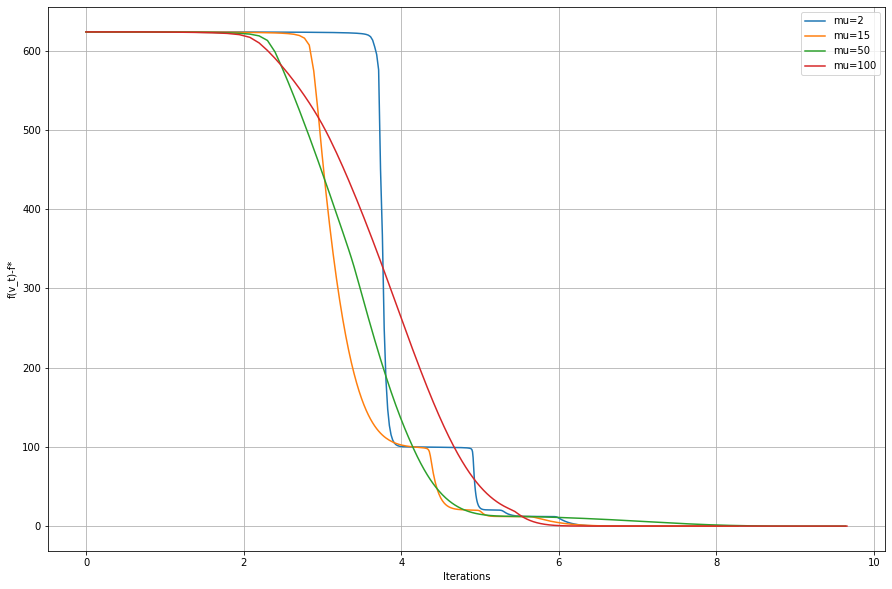

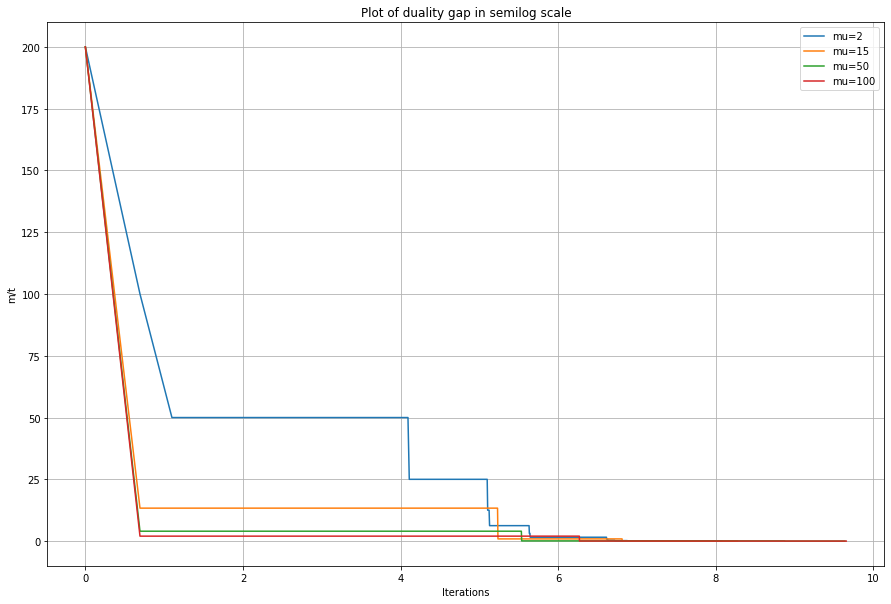

In [267]:
fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(15,10))
for mu in [2,15,50,100]:
    output=barr_method(Q,p,A,b,v0,eps,mu)
    values=output[1]
    duality_gap=output[3]
    minimum=values[-1][0][0]
    u=[]
    for i in values :
        u.append(i[0][0]-minimum)
    x = np.log(np.arange(1,len(u)+1,1))
    ax.plot(x, u,label="mu="+str(mu))
    ax.set(xlabel='Iterations', ylabel='f(v_t)-f*')
    plt.title('Plot of gap f(v_t)-f* in semilog scale')
    v=[]
    for i in duality_gap :
        v.append(i)
    x = np.log(np.arange(1,len(v)+1,1))
    ax1.plot(x, v,label='mu='+str(mu))
    ax1.set(xlabel='Iterations', ylabel='m/t')
    plt.title("Plot of duality gap in semilog scale")
    
ax.grid()
ax.legend()
ax1.grid()
ax1.legend()
plt.show()

4. Analyse pour X et y générés aléatoirement pour $n=10$ et $d=500$

In [258]:
X=200*np.random.random((10,500))-100*np.ones((10,500))
y=200*np.random.random((10,1))-100*np.ones((10,1))


v=np.ones((10,1))
v=np.transpose(X)@v
m=max(v)
v0=-np.ones((10,1))/(2*m)

Q=np.eye(10)/2
p,A=transform_parameters(X,y,10)

b=sqrt(20)*np.ones((np.shape(A)[0],1))
eps=0.01

Barrier method for mu= 2
Barrier method for mu= 15
Barrier method for mu= 50
Barrier method for mu= 100


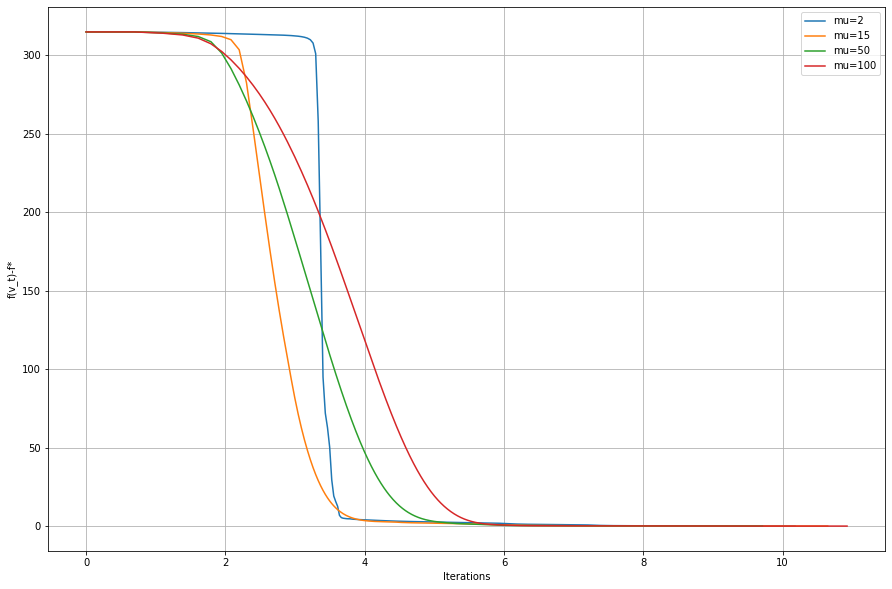

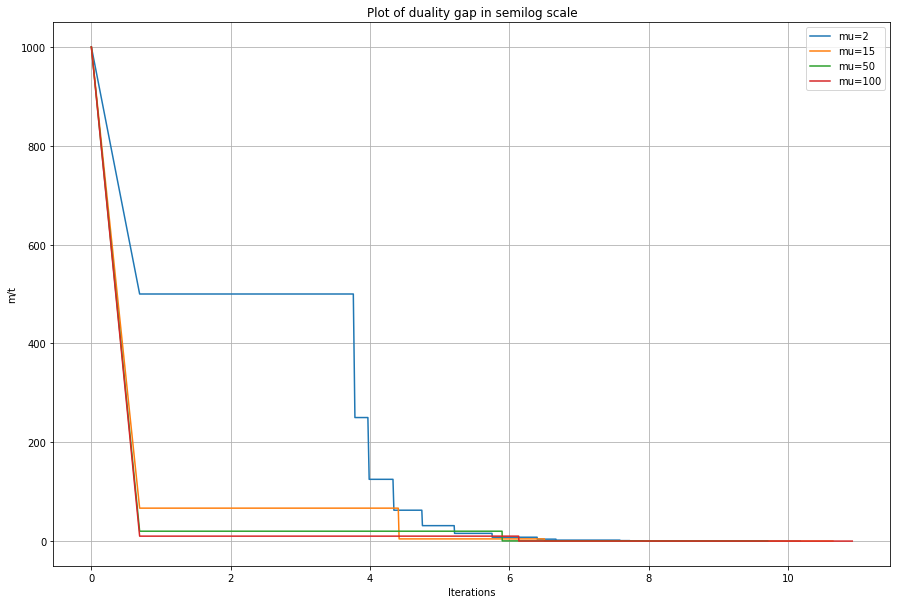

In [259]:
fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(15,10))
for mu in [2,15,50,100]:
    output=barr_method(Q,p,A,b,v0,eps,mu)
    values=output[1]
    duality_gap=output[3]
    minimum=values[-1][0][0]
    u=[]
    for i in values :
        u.append(i[0][0]-minimum)
    x = np.log(np.arange(1,len(u)+1,1))
    ax.plot(x, u,label="mu="+str(mu))
    ax.set(xlabel='Iterations', ylabel='f(v_t)-f*')
    plt.title('Plot of gap f(v_t)-f* in semilog scale')
    v=[]
    for i in duality_gap :
        v.append(i)
    x = np.log(np.arange(1,len(v)+1,1))
    ax1.plot(x, v,label='mu='+str(mu))
    ax1.set(xlabel='Iterations', ylabel='m/t')
    plt.title("Plot of duality gap in semilog scale")
    
ax.grid()
ax.legend()
ax1.grid()
ax1.legend()
plt.show()

5. Analyse pour X et y générés aléatoirement pour $n=3$ et $d=1000$

In [260]:
X=200*np.random.random((3,1000))-100*np.ones((3,1000))

y=200*np.random.random((3,1))-100*np.ones((3,1))


v=np.ones((3,1))
v=np.transpose(X)@v
m=max(v)
v0=-np.ones((3,1))/(2*m)

Q=np.eye(3)/2
p,A=transform_parameters(X,y,10)

b=sqrt(20)*np.ones((np.shape(A)[0],1))
eps=0.01

Barrier method for mu= 2
Barrier method for mu= 15
Barrier method for mu= 50
Barrier method for mu= 100


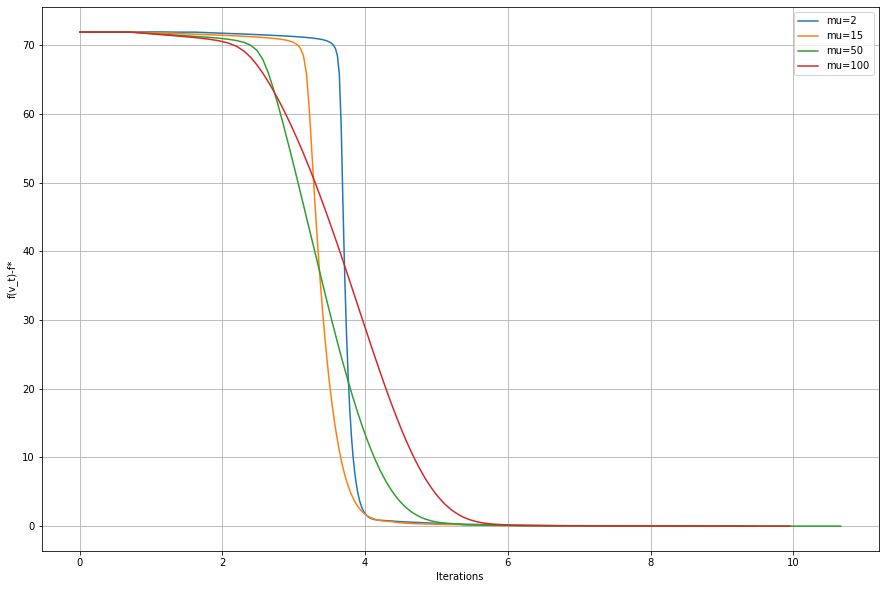

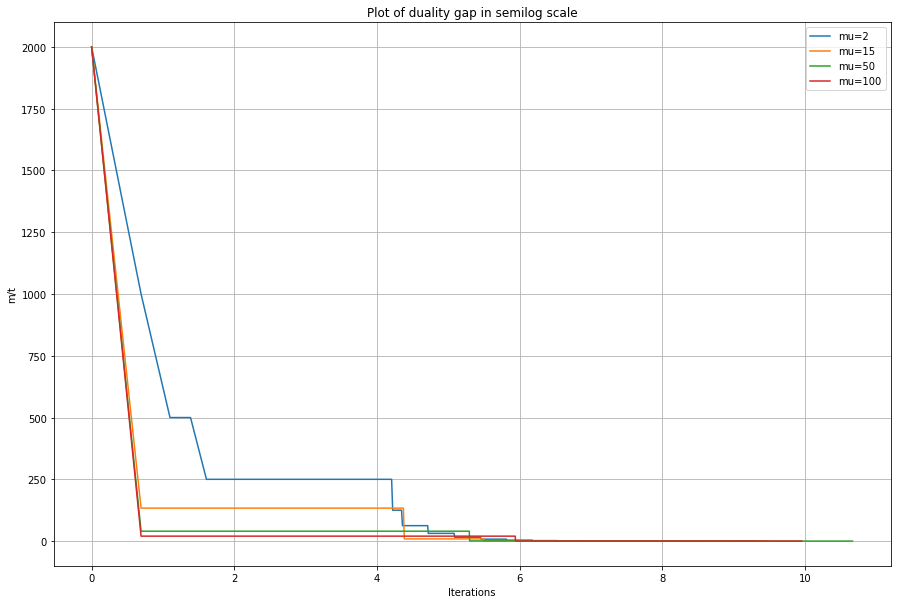

In [261]:
fig, ax = plt.subplots(figsize=(15,10))
fig1, ax1 = plt.subplots(figsize=(15,10))
for mu in [2,15,50,100]:
    output=barr_method(Q,p,A,b,v0,eps,mu)
    values=output[1]
    duality_gap=output[3]
    minimum=values[-1][0][0]
    u=[]
    for i in values :
        u.append(i[0][0]-minimum)
    x = np.log(np.arange(1,len(u)+1,1))
    ax.plot(x, u,label="mu="+str(mu))
    ax.set(xlabel='Iterations', ylabel='f(v_t)-f*')
    plt.title('Plot of gap f(v_t)-f* in semilog scale')
    v=[]
    for i in duality_gap :
        v.append(i)
    x = np.log(np.arange(1,len(v)+1,1))
    ax1.plot(x, v,label='mu='+str(mu))
    ax1.set(xlabel='Iterations', ylabel='m/t')
    plt.title("Plot of duality gap in semilog scale")
    
ax.grid()
ax.legend()
ax1.grid()
ax1.legend()
plt.show()